# INTRODUCTION

In today's market, many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. Some examples of paid products, which originate from free ones, are YouTube Red, Pandora Premium. Audible Subscription, and You Need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.

* Market: The target audience is customers who use a company's free product. In this case study, this refers to users who installed (and used) the company's free mobile app.

* Product: The paid memberships often provide enhanced versions of the free products already given for free, alongside new features. For example, Youtube Red allows you to leave the app while still listening to a video.

* Goal: The objective of this model is to predict which users will not subscribe to the paid membership, so that greater marketing efforts can go into trying to "convert" them to paid users.

# BUSINESS CHALLENGE

* In this Case Study we will be working for a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. To attract customers, the company releases a free version of their app with some of the main features unlocked.

* The company has tasked you to identify which users will most likely NOT enroll in the paid product, so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.

# DATA

* By working for the company, we have access to each customer's app behavior data. This data allows us to see the date and time of app installation, as well as the features the users engaged with within the app. App behavior is characterized as the list of app screens the user looked at, and whether the user played the financial mini-games available.

* The app usage data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features, and the company wants to target them with new offers shortly after the trial is over.

In [1]:
#import all the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
#import the data set using pandas
df = pd.read_csv(r"/kaggle/input/app-data/new_appdata10.csv")

In [3]:
#Check the data set how its look
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
 df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Data Cleaning
df['hour'] = df.hour.str.slice(1,3).astype(int)

In [6]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [7]:
#create a copy of dataset
df_temp = df.copy().drop(columns = ["user","screen_list","enrolled_date","enrolled","first_open"])

In [8]:
df_temp.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


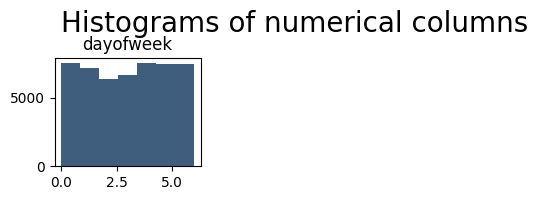

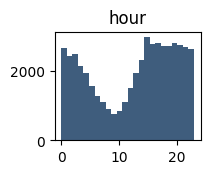

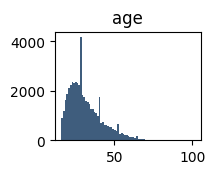

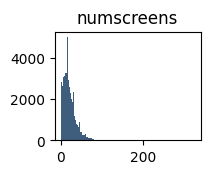

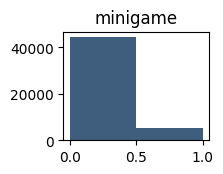

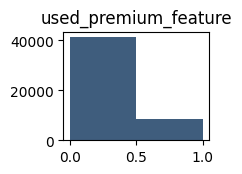

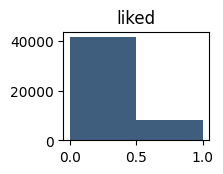

In [9]:
#Create a Histogram
plt.suptitle("Histograms of numerical columns", fontsize = 20)
for i in range(1, df_temp.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df_temp.columns.values[i - 1])
    
    vals = np.size(df_temp.iloc[:,i-1].unique())
    plt.hist(df_temp.iloc[:,i-1],bins = vals, color = '#3F5D7D')
    plt.show()

<Axes: title={'center': 'Correlation with Response Variable'}>

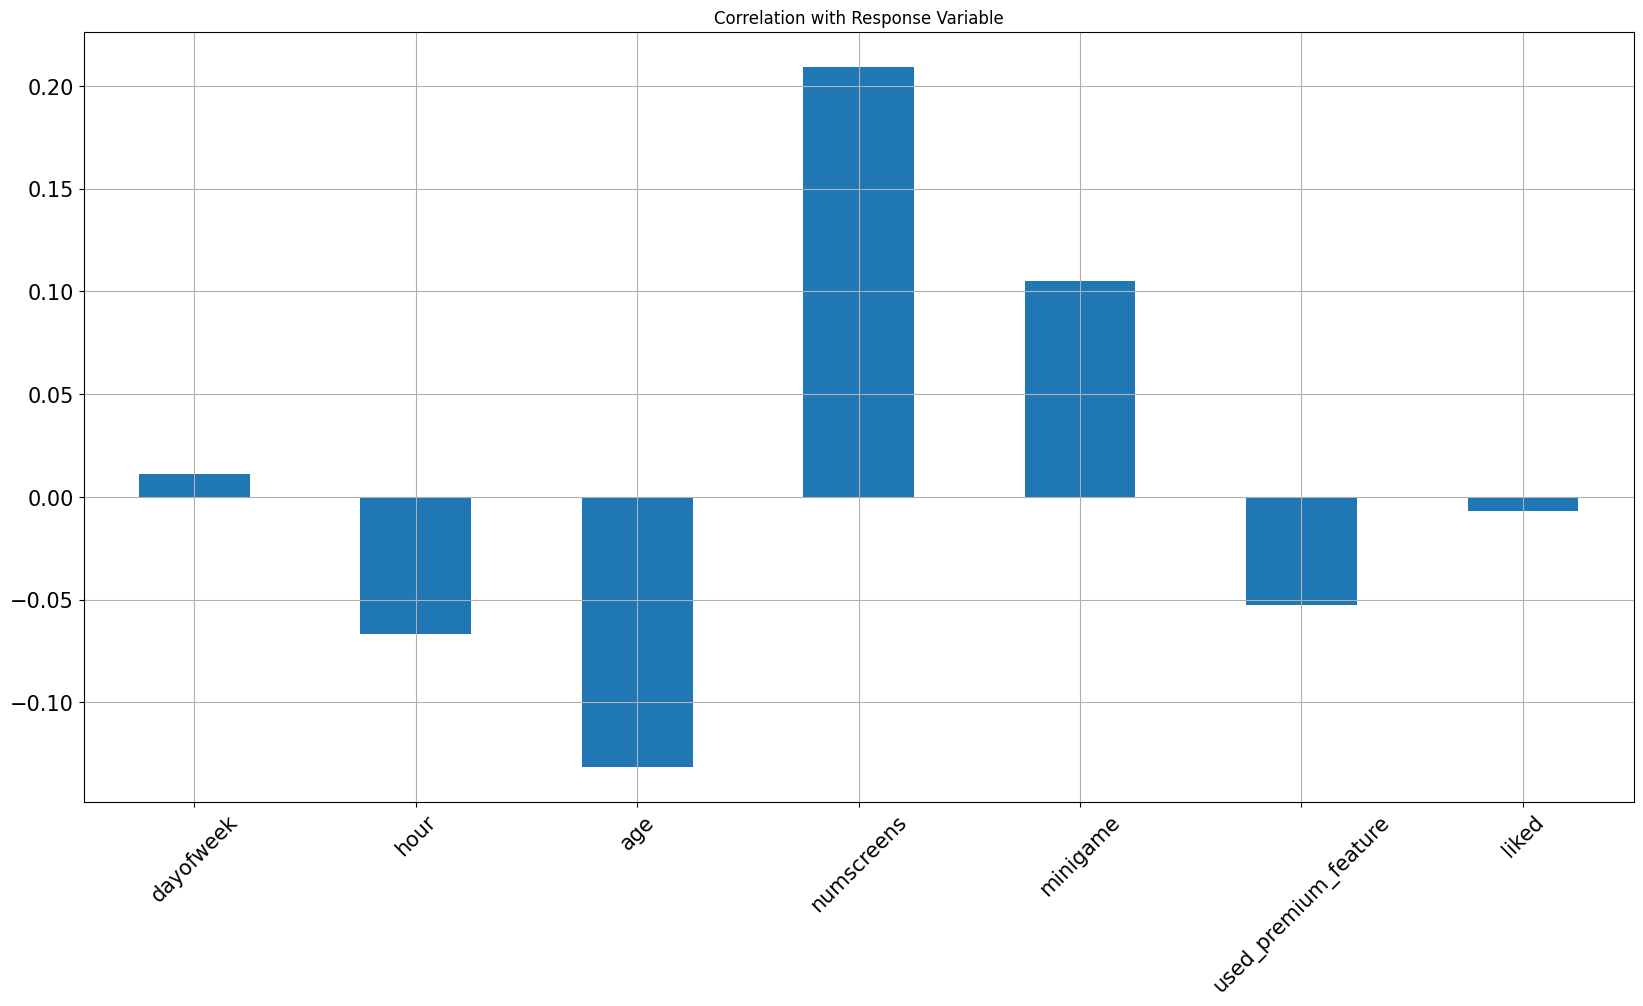

In [10]:
#Correlation with Responses
df_temp.corrwith(df["enrolled"]).plot.bar(figsize=(20,10), 
                                          title ="Correlation with Response Variable",
                                         fontsize = 15,
                                         rot =45,
                                         grid = True)

<Axes: >

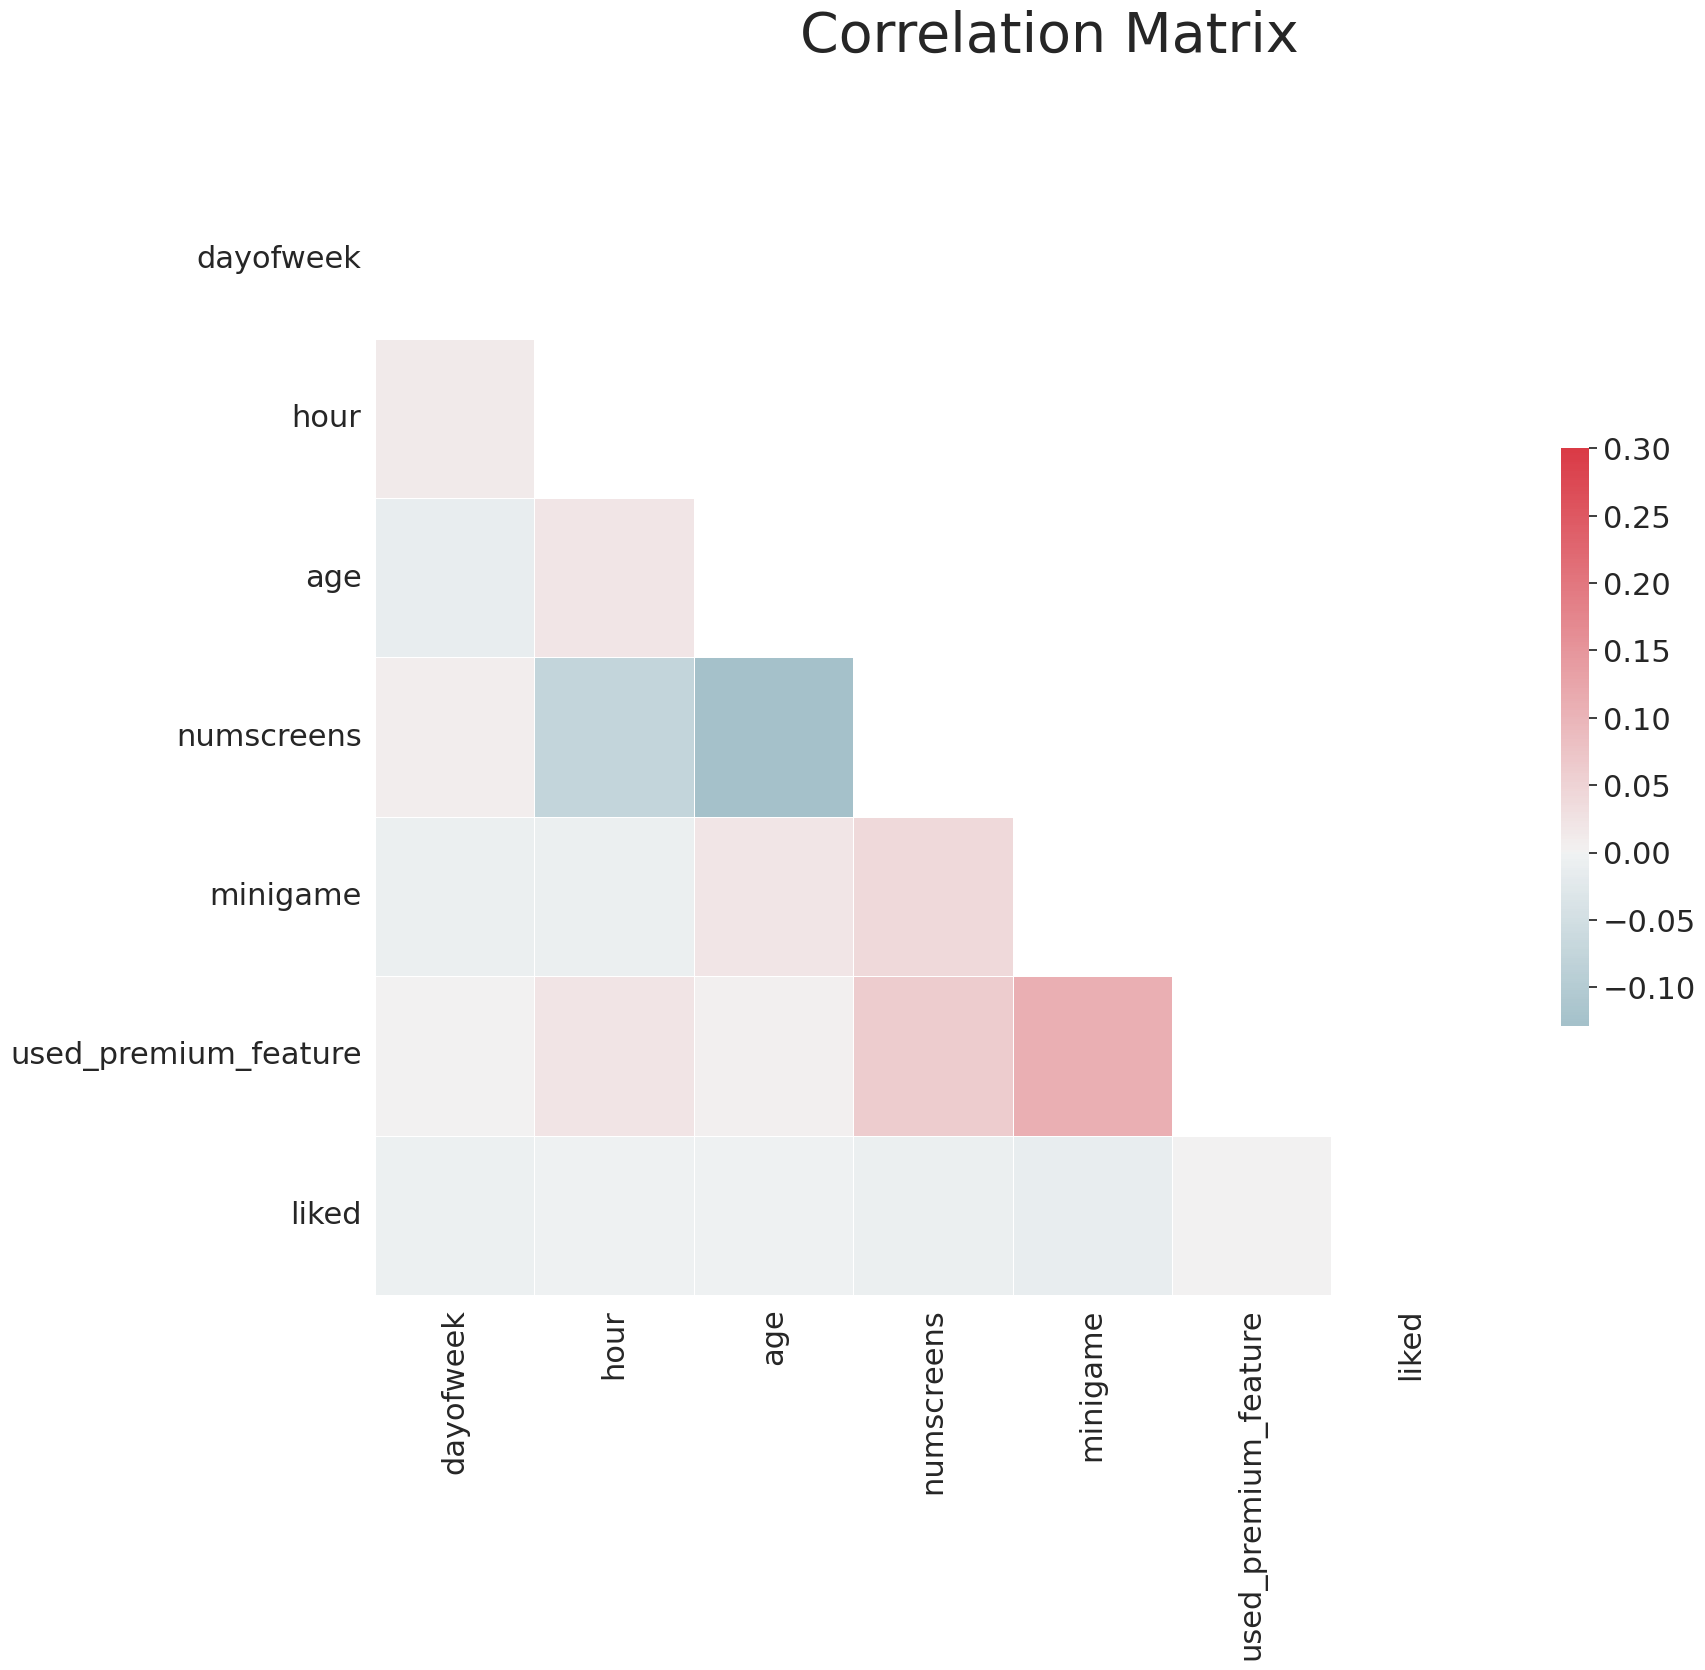

In [11]:
#Correlation matrix
sns.set(style = 'white', font_scale =2)

#Compute Correlation Matrix
corr = df_temp.corr()

#Genarte a mask for the upper triangle
mask = np.zeros_like(corr,dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
fig, axes = plt.subplots(figsize = (18,15))
fig.suptitle("Correlation Matrix", fontsize = 40)

#Generate a custome diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap = True)

#Draw the heatmap with the mask an correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths =0.5, cbar_kws = {"shrink": 0.5} )